## COGS 108 - Hackathon Submission (Group 53)
# Analyzing San Diego's Gentrification: Population, Income & Property

## Introduction
Through this project, we aspire to analyze and determine the major <b>gentrification-related factors</b> which contribute the most to <i>homelessness and the displacement</i> of people in San Diego. Moreover, we hope to establish ways and ideas which can help <u>reduce such negative effects</u> assocaited with gentrification.

<b>What is Gentrification?</b>
Gentrification is the process of renovating and improving a neighborhood or district so that it conforms to middle-class standards. 

<b>How do we plan to analyze Gentrification?</b>
Gentrification has multiple negative effects, including poverty, homelessness and mass displacement. These factors, are specifically due to one of Gentrification’s implications - Change (Increase) in Property Value. We believe that Property value is the reason for negative effects on Population, Income and Poverty.
<i>Hence, we plan to analyze the effects of Gentrification by analyzing Property value change, and it's effects.</i>


## Research Question
What are the gentrification-related factors which have the largest contribution to homelessness and the displacement of people in San Diego, and what would be required to reduce the negative effects assocaited with them?


## Hypothesis
We believe a significant increase in <b>property prices</b>, along with <b>increasing disparity in income growth</b> are having significant impacts in causing displacement and homelessness in San Diego. Increasing housing prices would signify a higher cost of living, while the increasing income disparity would mean low-income households would be less able to keep up with these costs.


## Data
In order to establish credibility and accuracy of our conclusion and analysis, we chose to look at multiple datasets from various sources.

Dataset #1: http://ds.civicknowledge.org.s3.amazonaws.com/sandiegodata.org/sandiegocensustract.xlsx <br>
Dataset #2: https://github.com/COGS108/Pr_053/blob/master/property.xls <br>
Dataset #3: https://github.com/COGS108/Pr_053/blob/master/sandag.xlsx (http://datasurfer.sandag.org/) <br>
Dataset #4: https://github.com/COGS108/Pr_053/blob/master/ZillowNeighborhoods-CA.shp <br>
Dataset #5: https://github.com/COGS108/Pr_053/blob/master/Alternative.shp <br>
Dataset #6: https://github.com/COGS108/Pr_053/blob/master/san-diego-ca-neighborhoods-Report.xls <br>

We chose to look at the Census data along with the Land Prices in San Diego to get an overview on how the changes in property values in San Diego have effected certain living standards and metrics, such as <u>education level, poverty and unemployment rates</u>. We also analyze and graph Property value data (by Zillow) to gain more insight. All of this data will be looked at across a period of time (<i>approximately 2007 - present</i>).

### Now, having established our ideas and intentions behind this project, we move forward to showcase our recent findings.

## Setting Up the Tools
Importing anticapted required libraries.

In [1]:
#Importing Required Libraries

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import scipy.stats
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import matplotlib.cm

# Importing and Cleaning the Data
Since we’re working with multiple data sets (with numerous features), from varying time frames, there is a significant amount of Data Cleaning required in this project. We’ll be dropping columns that we don’t intuitively feel correlate and are unrelated with gentrification, and, moreover, we’ll be merging a few datasets along the timeframe. 

In [2]:
#Importing Time Series Data for multiple aspects of San Diego
df_age = pd.read_excel("sandag.xlsx", sheetname="Age")
df_eth = pd.read_excel("sandag.xlsx", sheetname="Ethnicity")
df_house = pd.read_excel("sandag.xlsx", sheetname="Housing")
df_pop = pd.read_excel("sandag.xlsx", sheetname="Population")
df_income = pd.read_excel("sandag.xlsx", sheetname="Income")

#Reading census data
census_df = pd.read_excel('SD.xlsx')
#Cleaning census data & taking relevant features
census_df = census_df[['NeighborhoodName','TotalPopulation', 'PovertyRt', 'Unemployment', 'Uninsured']]
census_df = census_df.dropna()
#Grouping data by NeighborhoodName and taking the mean of all other features
census_df['Year'] = '2010'
census_df = census_df[['NeighborhoodName', 'Year', 'TotalPopulation','PovertyRt', 'Unemployment', 'Uninsured']].groupby(['NeighborhoodName'], as_index=False).mean()

#Reading Zillow property value data
property_df = pd.read_excel('property.xls')

# Analyzing the Data

First we will be looking at the correlation between these factors themselves - namely, Unemployment, Poverty and Income. We will do so to understand the nature of the negative impacts of Gentrification, and if they are correlated. By analyzing how the negative impacts of Property value correlate with each other, we will have a better idea of what to look for later on.

## Let's look at how some of these variables relate to each other:

### Unemployment vs Poverty Rate

In [ ]:
sns.lmplot(x='Unemployment',y='PovertyRt',data=census_df,fit_reg=True) 

### As we can see, increase in unemployment leads to an increase of Poverty. 
Let's look at some more subtle variables.


In [ ]:
sns.lmplot(x='Uninsured',y='PovertyRt',data=census_df,fit_reg=True)

### Again, More the number of people uninsured, more the poverty.
Now let's look at how closely these variables are related.

In [ ]:
census_df.corr()

### Correlation between Poverty Rate & Unemployment: 0.4 
### Correlation between Poverty Rate & Uninsurance: 0.657
### First Insight! <u>Poverty and Uninsurance are more strongly related than Poverty and Unemployment.</u> 

### Now, let's visualize the Population, Poverty and Unemployment in major areas of San Diego. It is essential to do so to quickly get a sense of the disparity of these factors within San Diego. This give insights about potentional range of the negative factors we are dealing with.

In [ ]:
#More Data Cleaning!
census_df.columns.values[0] = 'CPA' 
census_df['Year'] = '2010'
census_df = census_df[['CPA', 'Year', 'TotalPopulation','PovertyRt', 'Unemployment', 'Uninsured']].groupby(['CPA'], as_index=False).mean()

#Gathering 25 Popular San Diego Neighborhoods
other_df = df_pop[['CPA', 'POPULATION']].groupby(['CPA'], as_index=False).mean()
vis_df = pd.merge(other_df, census_df, on='CPA')

### Looking at Poverty Rate of different San Diego neighborhoods

In [ ]:
vis_df.plot(x='CPA', y='PovertyRt', kind='bar', color = 'red')

### Looking at Unemployment of different San Diego Neighborhoods

In [ ]:
vis_df.plot(x='CPA', y='Unemployment', kind='bar', color = 'blue')

### Looking at Population of different San Diego Neighborhoods

In [ ]:
vis_df.plot(x='CPA', y='TotalPopulation', kind='bar', color = 'yellow')

As expected, Neighborhoods with high Unemployment also indicated high Poverty <i>For eg. Bario Logan</i>. However, it's interesting to notice that the Poverty Rate of different neighborhoods in San Diego can range from <b> 0.08 to 0.45 </b>.

### TODO: Run correlation and T tests on Population VS Poverty Rate / Unemployment 

# Factors and Effects of Gentrification over Time

### Now, having looked at different areas of San Diego, and the correlation between a few of the negative possible factors of gentrification, we will now look at how these factors and effects, have changed over the years. 


In [42]:
zillow_SDdata = pd.read_excel("san-diego-ca-neighborhoods-Report.xls", header =2)
zillow_SDdata= zillow_SDdata.drop(zillow_SDdata.index[0])
zillow_SDdata = zillow_SDdata.drop("Region Type", axis =1)
zillow_SDdata = zillow_SDdata.drop("Type", axis =1)
zillow_SDdata = zillow_SDdata[zillow_SDdata.keys()[:7]]
zillow_SDdata = zillow_SDdata.drop(["Month Over Month","Quarter Over Quarter", "Year Over Year", "10 Year Annualized"], axis = 1)
zillow_SDdata = zillow_SDdata.replace("---", np.nan)
zillow_SDdata = zillow_SDdata.dropna()

columns = ["neighborhood", "Change", "2017", "2016", "2015", "2014", "2013"]
propertyValue_SD = pd.DataFrame(columns = columns)

for index, row in zillow_SDdata.iterrows():
    neighborhood = row["Region Name"]
    change = row['5 Year Annualized'] *100
    x_2017 = row["Current"]
    x_2016 = x_2017 * (1 - row["5 Year Annualized"]) 
    x_2015 = x_2016 * (1 - row["5 Year Annualized"]) 
    x_2014 = x_2015 * (1 - row["5 Year Annualized"]) 
    x_2013 = x_2014 * (1 - row["5 Year Annualized"])
    add_propertyValue_SD = pd.DataFrame([[neighborhood, change, x_2017, x_2016, x_2015, x_2014, x_2013]], columns = columns) 
    propertyValue_SD = propertyValue_SD.append(add_propertyValue_SD)

In [43]:
propertyValue_SD

,neighborhood,Change,2017,2016,2015,2014,2013
0,Adams North,10.57,654400.0,585229.92,5.233711e+05,4.680508e+05,4.185778e+05
0,Allied Gardens,8.44,544500.0,498544.20,4.564671e+05,4.179412e+05,3.826670e+05
0,Alta Vista,10.34,423700.0,379889.42,3.406089e+05,3.053899e+05,2.738126e+05
0,Azalea-Hollywood Park,14.51,394800.0,337514.52,2.885412e+05,2.466738e+05,2.108815e+05
0,Bay Ho,9.61,627400.0,567106.86,5.126079e+05,4.633463e+05,4.188187e+05
0,Bay Park,8.77,737200.0,672547.56,6.135651e+05,5.597555e+05,5.106649e+05
0,Bay Terraces,10.41,427100.0,382638.89,3.428062e+05,3.071201e+05,2.751489e+05
0,Bird Land,8.31,539400.0,494575.86,4.534766e+05,4.157927e+05,3.812403e+05
0,Black Mountain Ranch,7.03,1039800.0,966702.06,8.987429e+05,8.355613e+05,7.768213e+05
0,Carmel Mountain,7.32,689300.0,638843.24,5.920799e+05,5.487397e+05,5.085719e+05


# Property Value of Neighborhoods in San Diego for 2017

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("ZillowNeighborhoods-CA", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2017'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2017'])
plt.colorbar(mapper, shrink=0.4)

m

# Property Value of Neighborhoods in San Diego for 2016

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("ZillowNeighborhoods-CA", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2016'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2016'])
plt.colorbar(mapper, shrink=0.4)

m

# Property Value of Neighborhoods in San Diego for 2015

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("ZillowNeighborhoods-CA", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2015'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2015'])
plt.colorbar(mapper, shrink=0.4)

m

# Property Value of Neighborhoods in San Diego for 2014

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("ZillowNeighborhoods-CA", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2014'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2014'])
plt.colorbar(mapper, shrink=0.4)

m

# Property Value of Neighborhoods in San Diego for 2013

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("ZillowNeighborhoods-CA", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2013'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2013'])
plt.colorbar(mapper, shrink=0.4)

m

### Todos: <br/> 1) We need a slider animation to go through the maps over the years. <br/> 2) Property Value predictions until 2025

# Income Distribution Data

We will now be looking at how income levels have changed over time in certain neighborhoods of San Diego. 
The income in San Diego is spread out very unevenly between different neighborhoods, as shown below. So analyzing the changes in income levels at a neighborhood level may reveal signs of gentrification affecting certain areas in the city. To begin with, here is the income distribution in San Diego in 2016 in 3 different San Diego neighborhoods.

## Income Distribution: La Jolla 2016

In [ ]:
df_laj16 = df_income.loc[(df_income['CPA'] == "La Jolla") & (df_income['YEAR'] == 2016)]
df_laj16.plot(x="INCOME GROUP", y="HOUSEHOLDS", kind="bar", figsize=(10,10), stacked= True)

Usually, income tends to be skewed right, where there are a few exceptionally rich people. However, in La Jolla, there are a lot more wealthy households than the average.

## Income Distribution: Downtown 2016

In [ ]:
df_dwtn16 = df_income.loc[(df_income['CPA'] == "Downtown") & (df_income['YEAR'] == 2016)]
df_dwtn16.plot(x="INCOME GROUP", y="HOUSEHOLDS", kind="bar", figsize=(10,10), stacked= True)

On the other hand, Downtown's income distribution has many more households at the lower end than the average.

## Income Distribution: Kerny Mesa 2016

In [ ]:
df_krny16 = df_income.loc[(df_income['CPA'] == "Kearny Mesa") & (df_income['YEAR'] == 2016)]
df_krny16.plot(x="INCOME GROUP", y="HOUSEHOLDS", kind="bar", figsize=(10,10), stacked= True)

Kerney Mesa has a more "average" income distribution. These 3 areas highlight the income disparities between different neighborhoods in San Diego.

## Income over Time

The plots above show some distributions in 2016, but to show the effect of gentrification, we care about the changes in this distribution over time. The following plots show the changes in the total number of households in each income bracket for all of San Diego (aggregate of all neighborhoods).  

In [ ]:
ib = df_income.groupby(["ORDINAL", "YEAR"])["HOUSEHOLDS"].sum()
ib[1].plot(figsize=(15,10), label = "0 to 15k", legend="True" )
ib[2].plot(figsize=(15,10), label = "15k to 30k", legend="True")
ib[3].plot(figsize=(15,10),  label = "35k to 40k", legend="True")
ib[4].plot(figsize=(15,10), label = "45k to 60k", legend="True")
ib[5].plot(figsize=(15,10), label = "60k to 75k", legend="True" )

In [ ]:
ib[6].plot(figsize=(15,10), label = "75k to 100k", legend="True")
ib[7].plot(figsize=(15,10),  label = "100k to 125k", legend="True")
ib[8].plot(figsize=(15,10), label = "125k to 150k", legend="True")
ib[9].plot(figsize=(15,10), label = "150k to 200k", legend="True" )
ib[10].plot(figsize=(15,10), label = "200k+", legend="True")

From these plots, we can see that between 2011 and 2015, the number of households in poorer income brackets ( \$0k - $ $60k per year), significantly increased, while the middle class and upper middle class brackets see a slight decrease 

## TODO: Correlation Test vs Property Value & Population

# Map visualization of San Diego's Income Distribution
Chnges in income distribution can indicate to areas experiencing gentrification. As more middle class people into gentrified areas, income distributions may increase overall and areas where less-off people will move to, the mean income will drop.

In the following map we represent the percentage of households with income under \$30k, which is our standard of poverty, given that the official poverty line is \$24k. We plan to supplement this with a calculated <b>Gini Coefficient</b> values in the future.

In [30]:
cols = ['CPA', '2016', '2015', '2014', '2013', '2012', '2011', '2010', 'change']
df_30k = pd.DataFrame(columns=cols)

hoods = df_income.CPA.unique()

# building income levels for < 30k
for h in hoods:
    df_h = df_income.loc[df_income["CPA"] == h]
    df_15k = df_h.loc[(df_h["ORDINAL"] == 1) | (df_h["ORDINAL"] == 2)]
    
    yrs=[-1]*7
    for y in range(7):
        df_y = df_h.loc[df_h["YEAR"] == (2010+y)]
        df15_y = df_15k.loc[df_15k["YEAR"] == (2010+y)]
        poor_y = df15_y["HOUSEHOLDS"].sum()
        tot_y = df_y["HOUSEHOLDS"].sum()
        if (tot_y > 0):
            yrs[y] = (float(poor_y) / tot_y) * 100
    #Gets the overall nett change. Positive means more people are in poverty currently than before 
    change = yrs[0] - yrs[6]
    row = [h] + yrs + [change]
    df_r = pd.DataFrame([row], columns=cols)
    df_30k = df_30k.append(df_r, ignore_index=True)

#NOTE: if the number of households in that region in that year was 0, then the percentage is displayed as -1. 
#It's probably best to just throw out these rows

df_30k= df_30k.replace("-1", np.nan)
df_30k = df_30k.dropna()
df_30k.columns = ['neighborhood', '2016', '2015', '2014', '2013', '2012', '2011', '2010', 'change']
df_30k["neighborhood"]= df_30k.neighborhood.str.upper()

# Percentage of Households in Poverty per Neighborhood for 2016

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2016'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2016'])
plt.colorbar(mapper, shrink=0.4)

m

# Percentage of Households in Poverty per Neighborhood for 2015

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2015'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2015'])
plt.colorbar(mapper, shrink=0.4)

m

# Percentage of Households in Poverty per Neighborhood for 2014

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2014'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2014'])
plt.colorbar(mapper, shrink=0.4)

m

# Percentage of Households in Poverty per Neighborhood for 2013

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2013'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2013'])
plt.colorbar(mapper, shrink=0.4)

m

# Percentage of Households in Poverty per Neighborhood for 2012

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2012'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2012'])
plt.colorbar(mapper, shrink=0.4)

m

# Percentage of Households in Poverty per Neighborhood for 2011

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2011'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2011'])
plt.colorbar(mapper, shrink=0.4)

m

# Percentage of Households in Poverty per Neighborhood for 2010

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2010'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2010'])
plt.colorbar(mapper, shrink=0.4)

m

# Population Data

In [3]:
df_pop_struct = df_pop.groupby(['CPA', 'YEAR']).sum()
df_pop_struct = df_pop_struct.reset_index()

df2 = {}
df2['2010'] = df_pop_struct[df_pop_struct['YEAR']==2010].set_index('CPA').drop('YEAR',axis=1)['POPULATION']
df2['2011'] = df_pop_struct[df_pop_struct['YEAR']==2011].set_index('CPA').drop('YEAR',axis=1)['POPULATION']
df2['2012'] = df_pop_struct[df_pop_struct['YEAR']==2012].set_index('CPA').drop('YEAR',axis=1)['POPULATION']
df2['2013'] = df_pop_struct[df_pop_struct['YEAR']==2013].set_index('CPA').drop('YEAR',axis=1)['POPULATION']
df2['2014'] = df_pop_struct[df_pop_struct['YEAR']==2014].set_index('CPA').drop('YEAR',axis=1)['POPULATION']
df2['2015'] = df_pop_struct[df_pop_struct['YEAR']==2015].set_index('CPA').drop('YEAR',axis=1)['POPULATION']
df2['2016'] = df_pop_struct[df_pop_struct['YEAR']==2016].set_index('CPA').drop('YEAR',axis=1)['POPULATION']

df2 = pd.concat(df2,axis=1)
df2 = df2.reset_index()
df2.columns = ['neighborhood', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

### Population of each neighborhood in San Diego over this period
This is an overview of the population of San Diego as a whole, illustrating the changes between different neighborhoods. The slopes of each neighborhood represent the changes in populations over time.

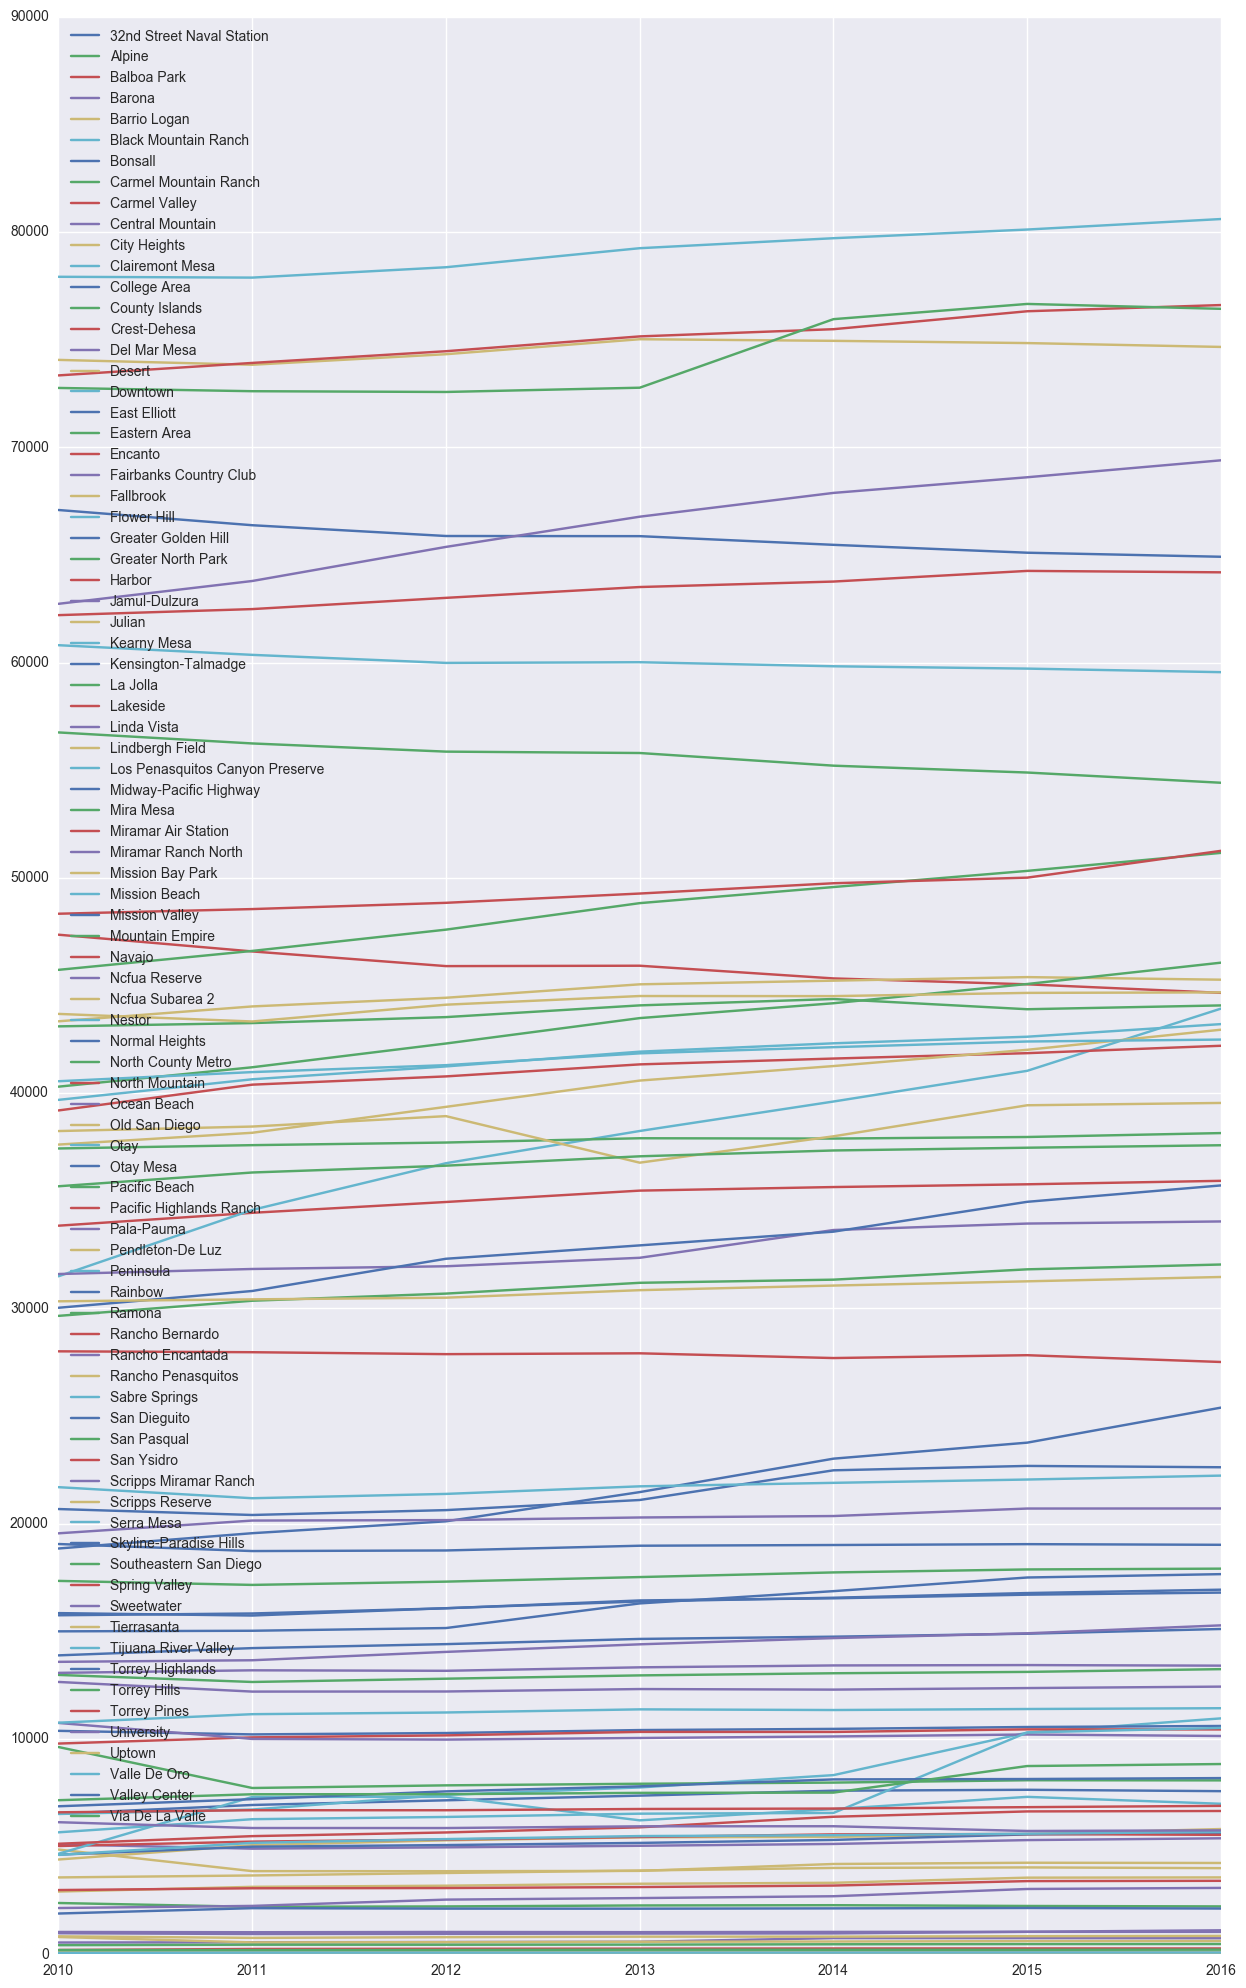

In [4]:
for i, r in df2.iterrows():
    r[1:].plot(figsize=(15,25), label= r[0], legend=True)
    

### Biggest Changes in Population

These are the neighborhoods with the largest net population changes over the last 6 years. Each point on the graph represents the percent change in the population from the previous year. Each slope represents how drastically the population is changing from year to year

In [14]:
#delta from 2010 to 2016
cols = ["neighborhood", "2011", "2012", "2013", "2014", "2015", "2016", "net", "abs(net)"]
df_pop_change = pd.DataFrame(columns = cols)
df2 = df2.replace(0, np.nan)
df2 = df2.dropna()
deltas = [0] * 6
for i, r in df2.iterrows():
    for y in range(6):
        deltas[y] = (float(r[y+2] - r[y+1]) / r[y+1] * 100)
    net = np.sum(deltas)
    net_abs = abs(net)
    row = [r[0]] + deltas + [net, net_abs]
    df_r = pd.DataFrame([row], columns = cols)
    df_pop_change = df_pop_change.append(df_r, ignore_index=True)
    df_sort = df_pop_change.sort_values("abs(net)", ascending=False)

Neighborhoods with largest Population Change
         KEARNY MESA:     74.297
BLACK MOUNTAIN RANCH:     55.496
                OTAY:     54.094
    RANCHO ENCANTADA:     37.844
              BARONA:     34.740
            DOWNTOWN:     34.358
         BALBOA PARK:     32.468


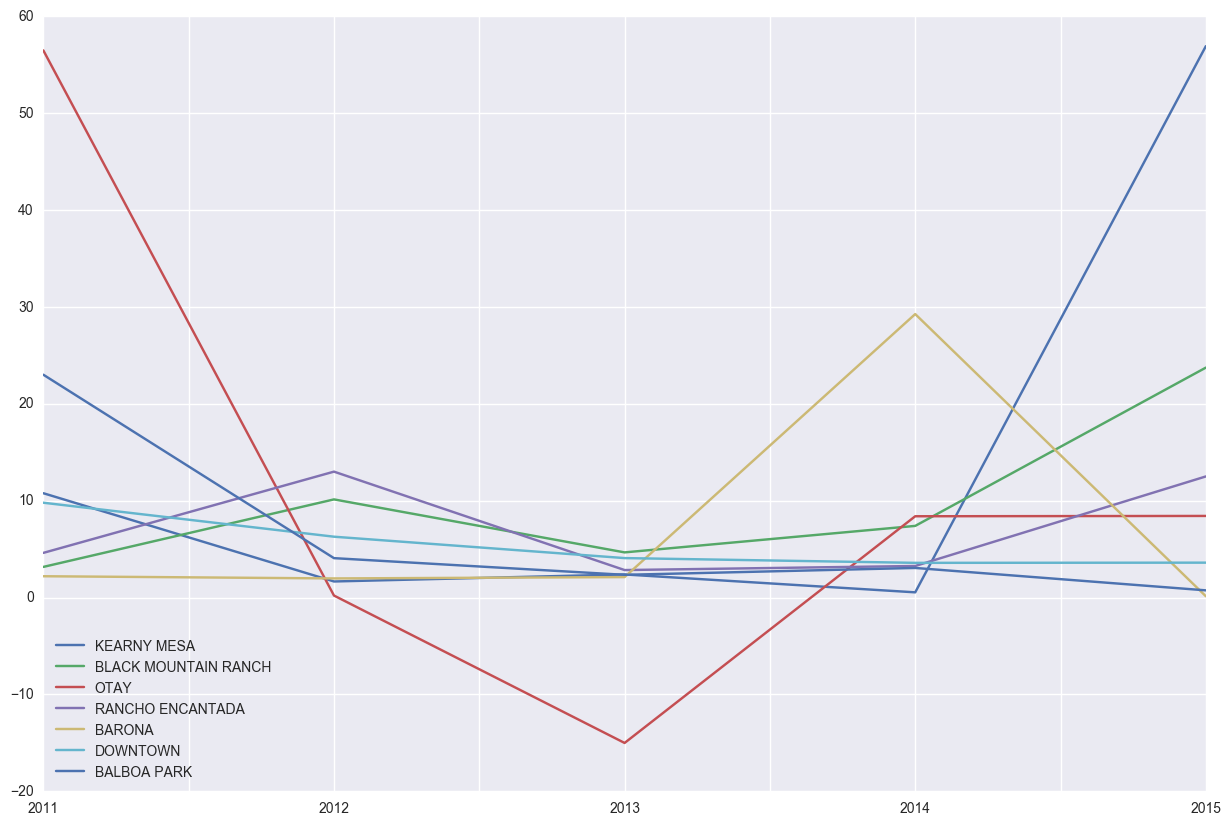

In [15]:
print("Neighborhoods with largest Population Change")
for i, r in df_sort.head(7).iterrows():
        r[1:6].plot(figsize= (15,10), label= r[0], legend=True)
        print("%20s: %10.3f" % (r[0], r[7]))

These are the neighborhoods that have had the largest net loss in population over the years. 

Neighborhoods with Population Loss
         Mission Bay Park:    -20.390
          Mountain Empire:    -15.258
             Barrio Logan:    -10.921
           County Islands:     -6.531
               Pala-Pauma:     -6.196
                  Encanto:     -5.834
            Jamul-Dulzura:     -5.542
   Southeastern San Diego:     -4.189
   Skyline-Paradise Hills:     -3.279
                   Nestor:     -2.076


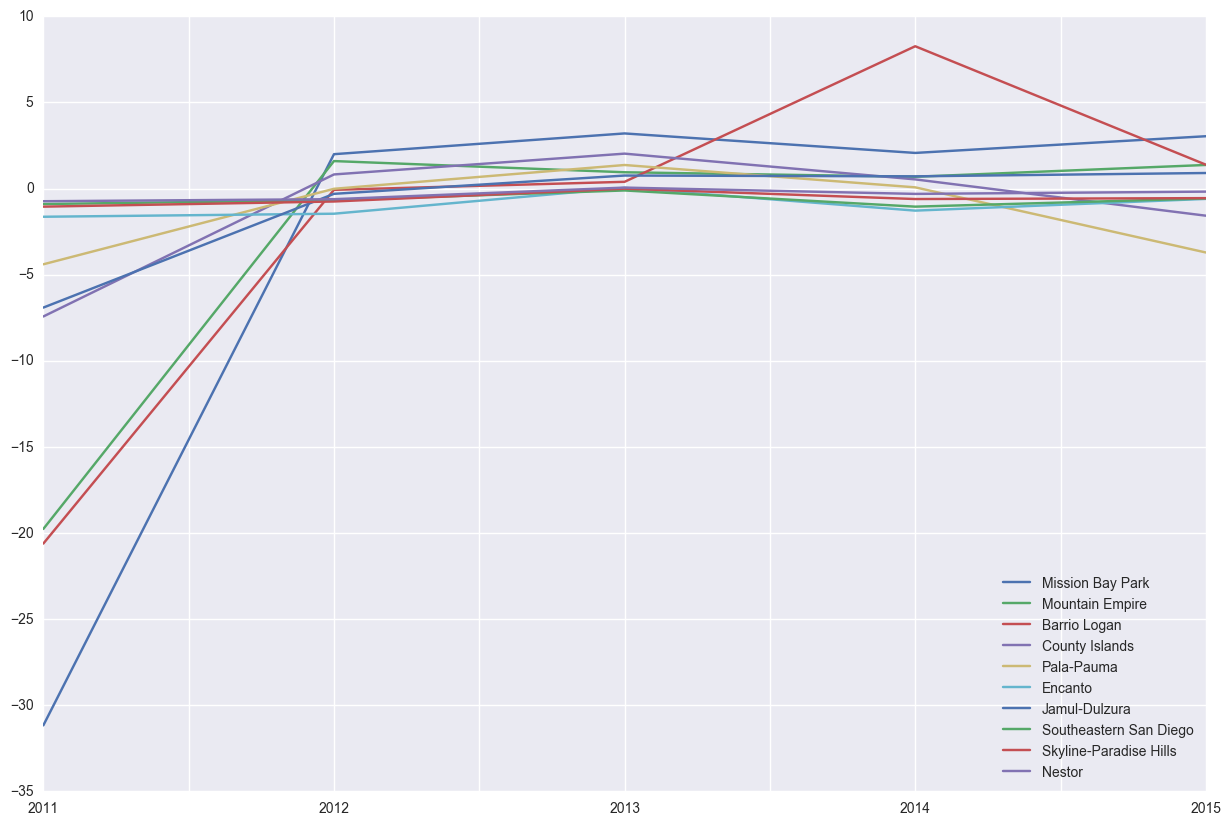

In [7]:
print("Neighborhoods with Population Loss")
neg_sort = df_pop_change.sort_values("net", ascending=True)
for i, r in neg_sort.head(10).iterrows():
        r[1:6].plot(figsize= (15,10), label= r[0], legend=True)
        print("%25s: %10.3f" % (r[0], r[7]))

# This is a representation of the Population distribution of San Diego over a period of 5 years

We believe that, as a result of gentrification, the populations within the neighborhoods would change resulting in the neighborhoods with high property value having the largest changes in population. The following maps the populations of each region in San Diego over the years.

In [16]:
df2["neighborhood"]= df2.neighborhood.str.upper()
df_sort["neighborhood"]= df_sort.neighborhood.str.upper()

In [17]:
df2= df2.replace("0", np.nan)
df_sort= df_sort.replace("0", np.nan)

In [18]:
df2= df2.dropna()
df_sort= df_sort.dropna()

# Total population distribution of San Diego for 2016

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2016'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2016'])
plt.colorbar(mapper, shrink=0.4)

m

# Total population distribution of San Diego for 2015

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2015'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2015'])
plt.colorbar(mapper, shrink=0.4)

m

# Total population distribution of San Diego for 2014

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2014'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2014'])
plt.colorbar(mapper, shrink=0.4)

m

# Total population distribution of San Diego for 2013

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2013'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2013'])
plt.colorbar(mapper, shrink=0.4)

m

# Total population distribution of San Diego for 2012

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2012'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2012'])
plt.colorbar(mapper, shrink=0.4)

m

# Total population distribution of San Diego for 2011

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2011'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2011'])
plt.colorbar(mapper, shrink=0.4)

m

# Total population distribution of San Diego for 2010

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2010'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2010'])
plt.colorbar(mapper, shrink=0.4)

m

# Change in Property Value of Neighborhoods in San Diego

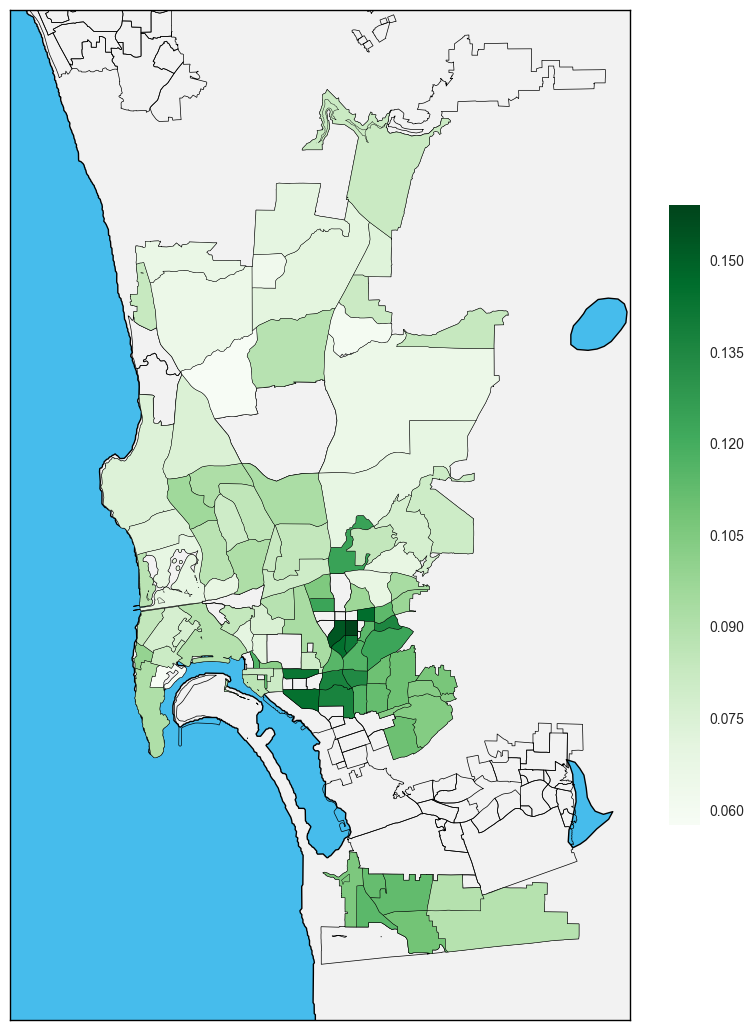

In [28]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("ZillowNeighborhoods-CA", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['Change'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['Change'])
plt.colorbar(mapper, shrink=0.4)

m

# Change in Percentage of Households in Poverty per Neighborhood

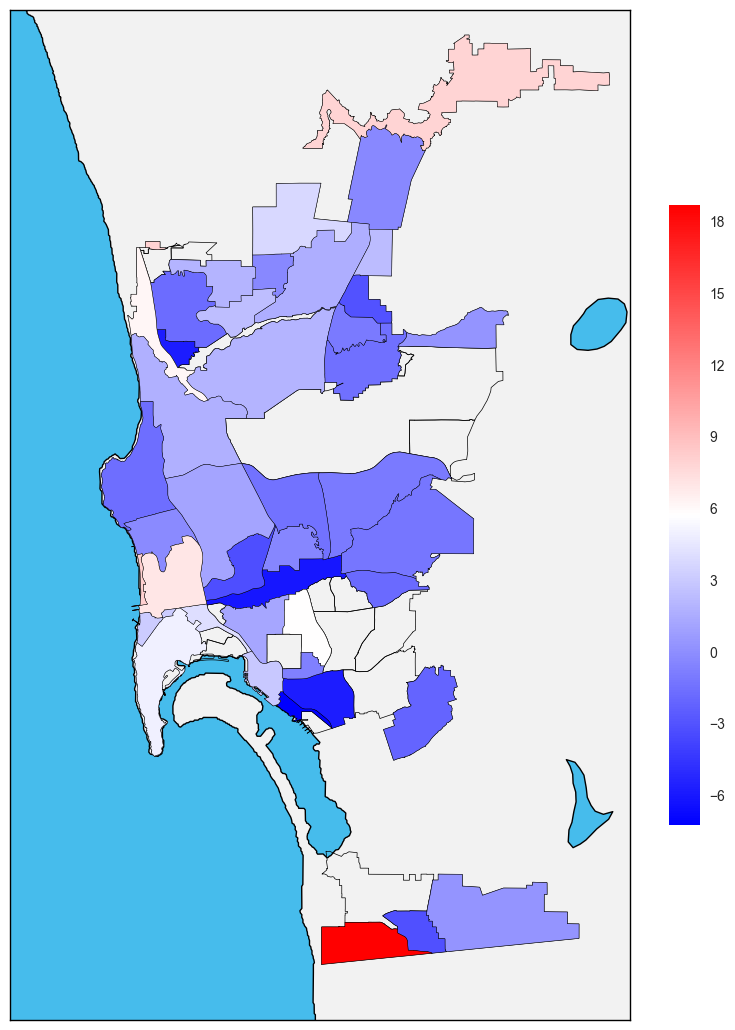

In [41]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('bwr')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['change'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['change'])
plt.colorbar(mapper, shrink=0.4)

m

In [40]:
matplotlib.cm.ScalarMappable?

# Changes in Total population distribution of San Diego

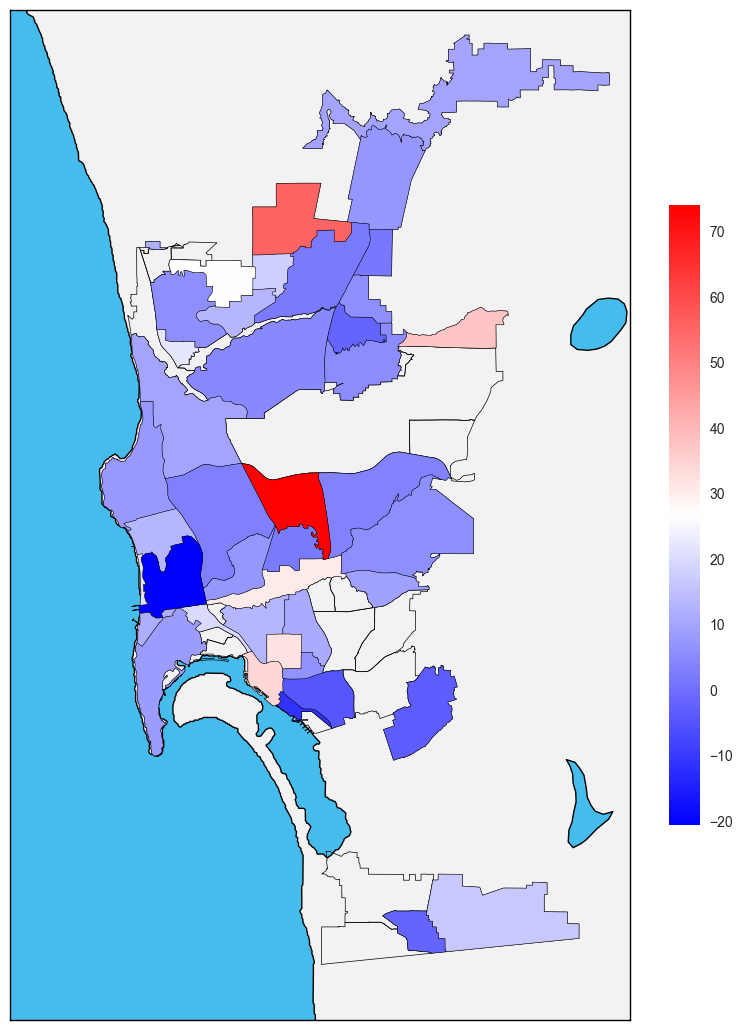

In [19]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_sort, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('bwr')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['net'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['net'])
plt.colorbar(mapper, shrink=0.4)

m

# The Bottom Line
Since we have analyzed and well-formatted the data, we can now easily run statistical tests (such as the T-Test) to find and discover correlations between the multiple factors and effects. <br>
Moreover, since we have found the neighborhoods with maximum population change, we also want to look at the neighborhoods with the maximum property value change & income, and look at how these neighborhoods are connected.
<br>
Also, we want to use our data to predict the factors and effects of gentrification in San Diego in the coming years. <br>
Most importantly, we aspire to find feasible ways to reduce and minimize the effects of Gentrification.